In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st

company_trips = pd.read_csv('/datasets/project_sql_result_01.csv')

location_avg_trips = pd.read_csv('/datasets/project_sql_result_04.csv')

trips_loop_airport = pd.read_csv('/datasets/project_sql_result_07.csv')

In [4]:
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
company_trips.head(5)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [6]:
location_avg_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
location_avg_trips.head(5)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Las tablas contienen 2 columnas cada una, sin valores nulos o ausentes. Los tipos de datos son correctos.

Los 10 principales barrios en términos de finalización del recorrido

In [8]:
location_avg_trips.nlargest(10, 'average_trips')

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Gráficos

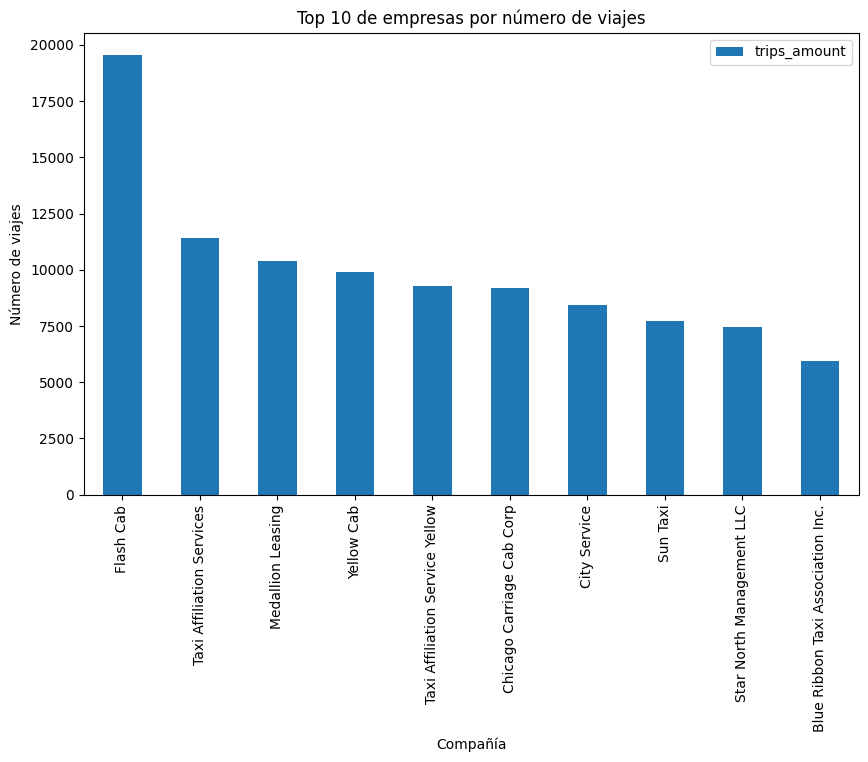

In [11]:
top_10_companies_by_trips = company_trips.nlargest(10, 'trips_amount')
top_10_companies_by_trips.plot(kind='bar', x='company_name', y='trips_amount', title='Top 10 de empresas por número de viajes',figsize=(10, 6))

plt.xlabel('Compañía')
plt.ylabel('Número de viajes')
plt.show()

Conclusión: Flash Cab es la empresa con mayor numero de viajes con 14% de los viajes totales.

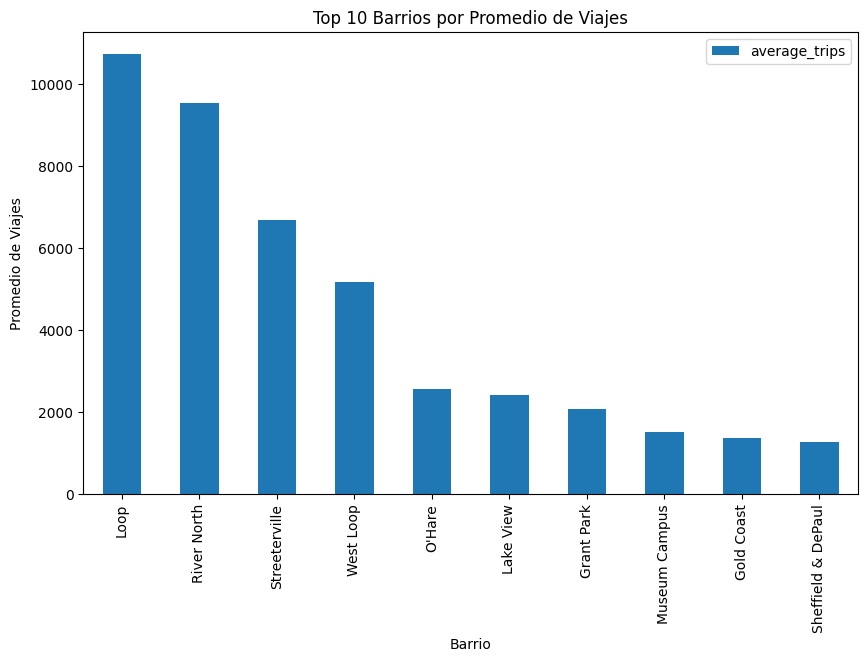

In [10]:
top_10_neighborhoods = location_avg_trips.nlargest(10, 'average_trips')
top_10_neighborhoods.plot(kind='bar', x='dropoff_location_name', y='average_trips', title='Top 10 Barrios por Promedio de Viajes', figsize=(10, 6))

plt.xlabel('Barrio')
plt.ylabel('Promedio de Viajes')
plt.show()

Conclusión: Loop es el barrio con mayor numero de viajes en promedio.

Prueba de hipótesis

In [11]:
#Variable con la duracion de los viajes con mal clima

bad_weather_trips = trips_loop_airport[trips_loop_airport['weather_conditions'].str.contains('Bad')].drop(columns=['weather_conditions', 'start_ts']).dropna()

bad_weather_trips

,duration_seconds
6,2969.0
30,1980.0
34,2460.0
51,2760.0
52,2460.0
...,...
1031,2560.0
1032,1908.0
1053,2400.0
1061,2186.0


In [12]:
#Variable con la duracion de los viajes con buen clima

good_weather_trips = trips_loop_airport[trips_loop_airport['weather_conditions'].str.contains('Good')].drop(columns=['weather_conditions', 'start_ts']).dropna()   

good_weather_trips

,duration_seconds
0,2410.0
1,1920.0
2,1543.0
3,2512.0
4,1440.0
...,...
1062,1500.0
1063,0.0
1064,1318.0
1065,2100.0


Prueba de Levine para comprobar si las varianzas son iguales o no.

In [15]:
### Prueba de Levine
###  H0: Las varianzas de los 2 grupos son iguales.
### H1: Las varianzas de los 2 grupos no son iguales.

group1 = bad_weather_trips['duration_seconds']

group2 = good_weather_trips['duration_seconds']

results = st.levene(group1, group2)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza hipotesis nula, las varianzas no son iguales")
else:
    print("No se rechaza la hipotesis nula, las varianzas son iguales")


0.5332038671974493
No se rechaza la hipotesis nula, las varianzas son iguales


Prueba t para muestras independientes con varianzas iguales

In [17]:
#### Prueba de T de Student
### H0: Las medias de los 2 grupos son iguales.
### H1: Las medias de los 2 grupos no son iguales.

results = st.ttest_ind(group1, group2, equal_var=True)

print(results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza hipotesis nula, las medias no son iguales")
else:
    print("No se rechaza la hipotesis nula, las medias son iguales")

6.517970327099473e-12
Se rechaza hipotesis nula, las medias no son iguales


Conclusion: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.